 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [128]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [129]:
# Reading whale returns
csv_file = Path('Resources/whale_returns.csv')
whale_returns_csv = pd.read_csv(csv_file, index_col= 'Date', parse_dates=True)
whale_returns_csv.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [130]:
# Count nulls
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [131]:
# Drop nulls
whale_returns_csv = whale_returns_csv.dropna().copy()
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [132]:
# Reading algorithmic returns
algo_file = Path('Resources/algo_returns.csv')
algo_returns_csv = pd.read_csv(algo_file, index_col= 'Date', parse_dates=True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [133]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [134]:
# Drop nulls
algo_returns_csv.dropna(inplace = True)
algo_returns_csv.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [245]:
# Reading S&P 500 Closing Prices
sp500_history_file = Path('Resources/sp500_history.csv')
sp500_csv = pd.read_csv(sp500_history_file, index_col= 'Date', parse_dates=True)
sp500_csv.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [246]:
# Check Data Types
sp500_csv.dtypes

Close    object
dtype: object

In [247]:
# Fix Data Types
sp500_csv['Close'] = sp500_csv['Close'].str.replace("$", "")
sp500_csv['Close'] = sp500_csv['Close'].astype("float")
sp500_csv.head()


/var/folders/dr/m101dzn51zb9tvcs8pnjgk480000gn/T/ipykernel_1773/3822861016.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_csv['Close'] = sp500_csv['Close'].str.replace("$", "")


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [138]:
# Calculate Daily Returns
sp500_returns = sp500_csv.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [139]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [140]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={'Close' : 'sp500'})
sp500_returns.head()

,sp500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [141]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_csv, algo_returns_csv, sp500_returns], axis='columns', join='inner')
combined_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

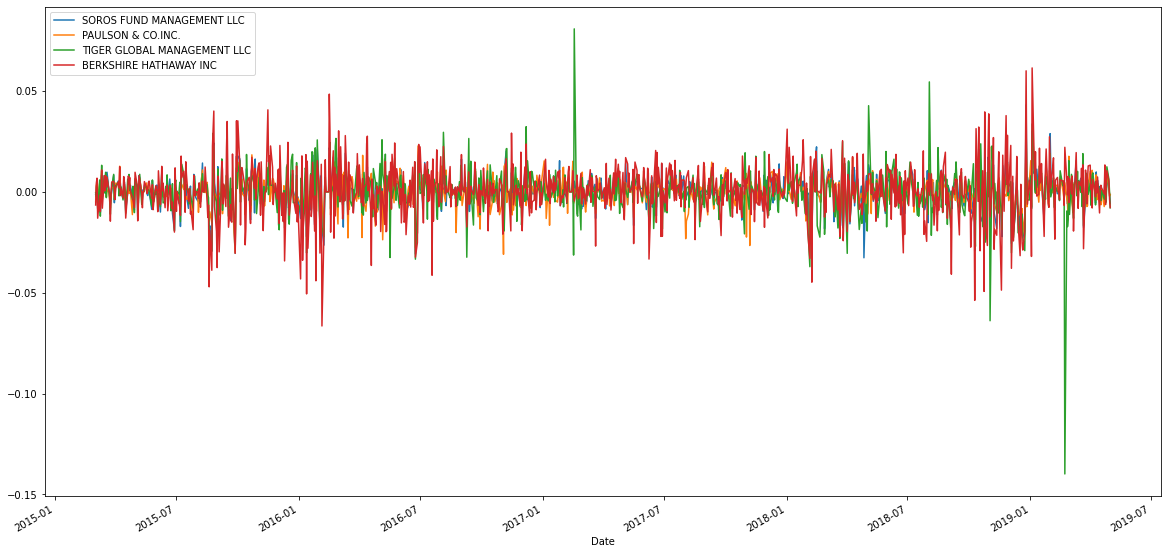

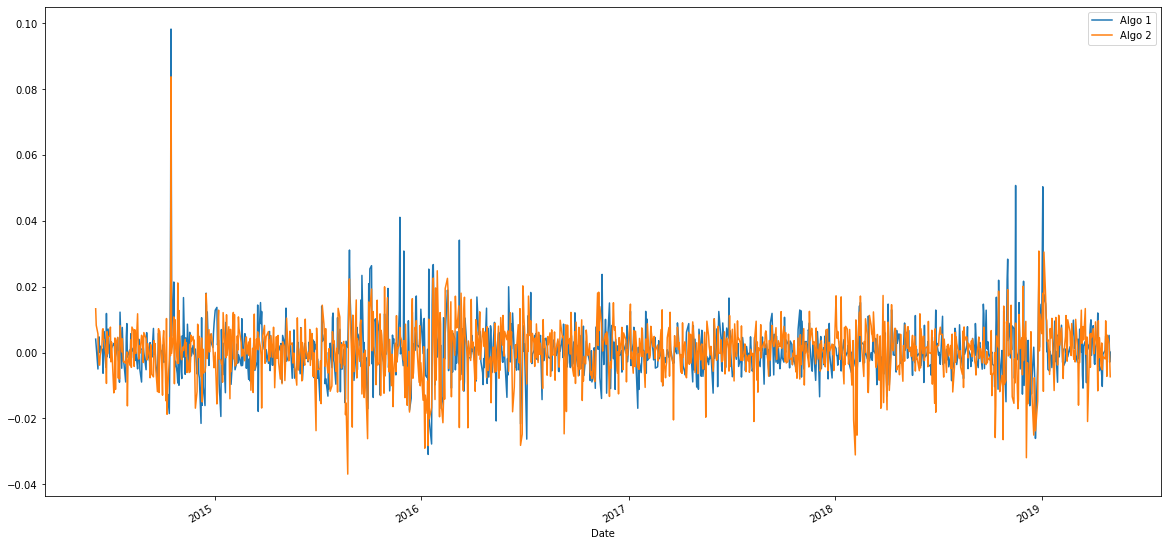

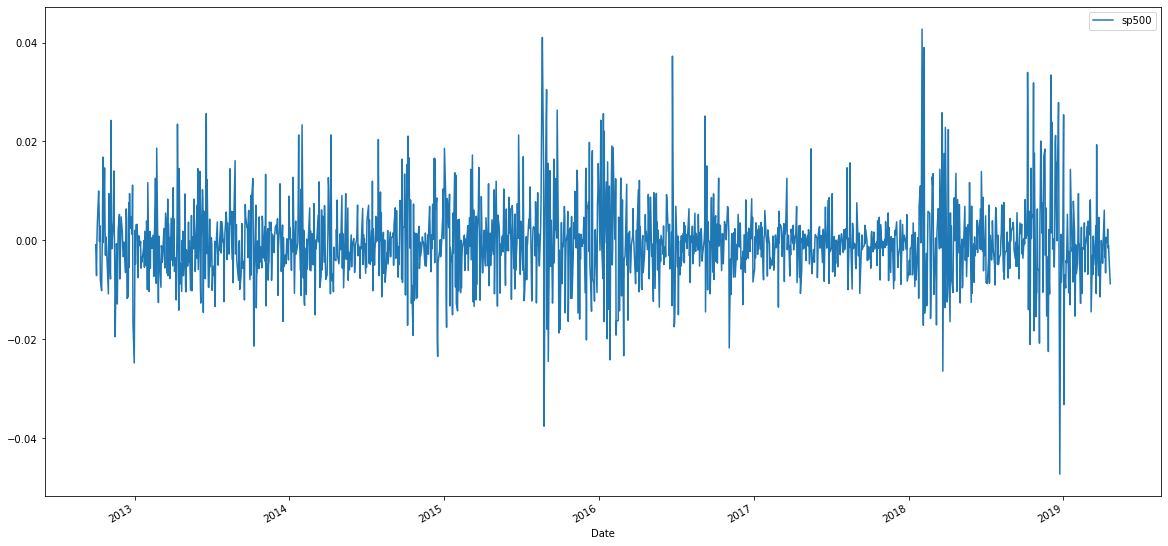

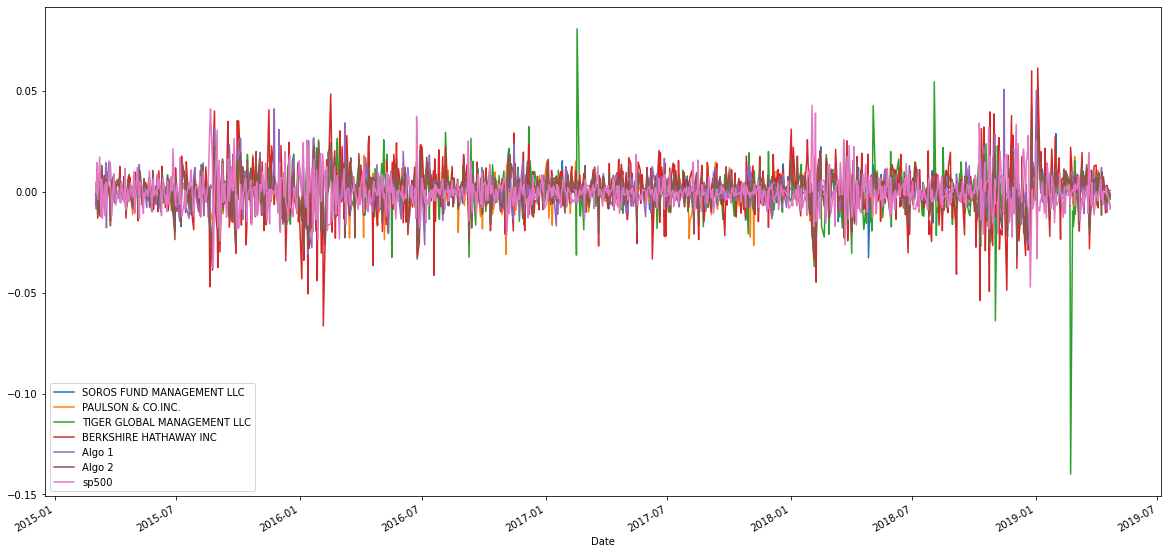

In [142]:
# Plot daily returns of all portfolios
whale_returns_csv.plot(figsize=(20,10))
algo_returns_csv.plot(figsize=(20,10))
sp500_returns.plot(figsize=(20,10))
combined_returns.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

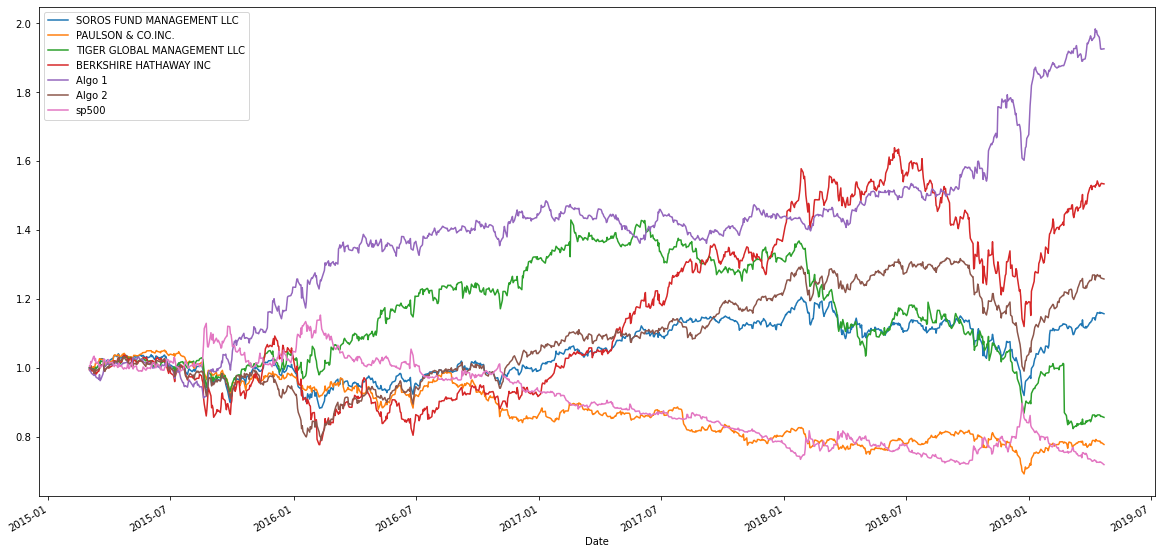

In [143]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

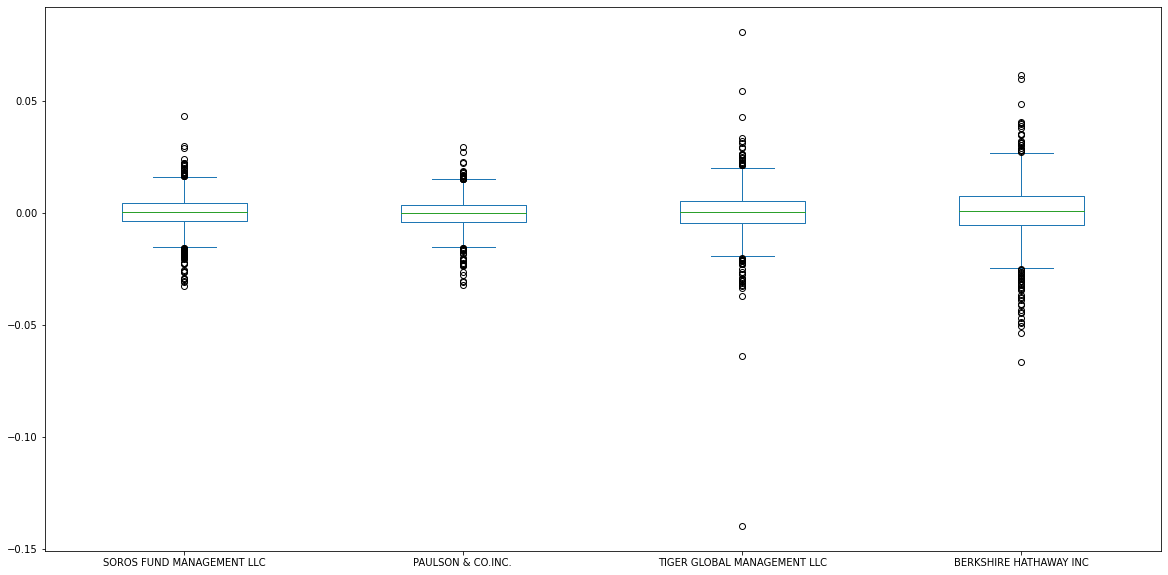

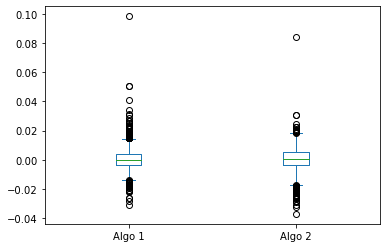

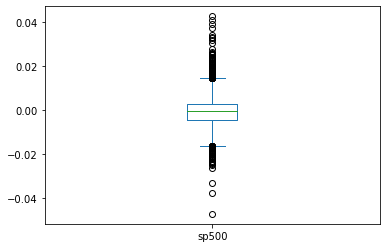

In [144]:
# Box plot to visually show risk
whale_returns_csv.plot.box(figsize=(20,10))
algo_returns_csv.plot.box()
sp500_returns.plot.box()

### Calculate Standard Deviations

In [145]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_returns.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
sp500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [146]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns['sp500'].std()
sp500_std
# Determine which portfolios are riskier than the S&P 500
combined_daily_std = combined_daily_std.sort_values(ascending=False)
combined_daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
sp500                          0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Calculate the Annualized Standard Deviation

In [147]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std * np.sqrt(252)
annual_std = annual_std.sort_values(ascending=False)
annual_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
sp500                          0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

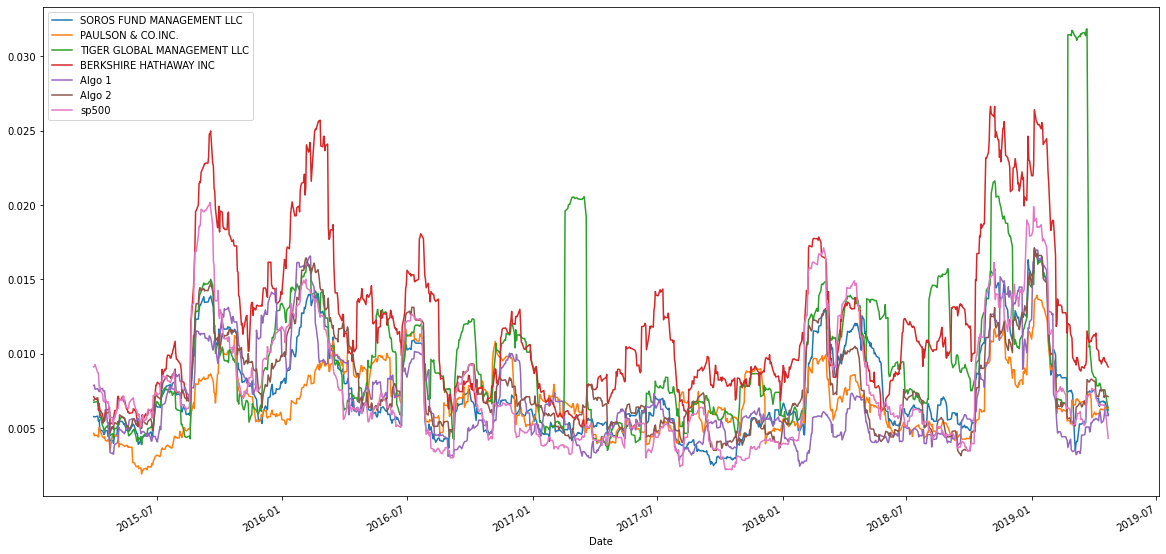

In [194]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
comb_roll_std = combined_returns.rolling(window=21).std()

# Plot the rolling standard deviation
comb_roll_std.plot(figsize=(20,10)) 

### Calculate and plot the correlation

<AxesSubplot:>

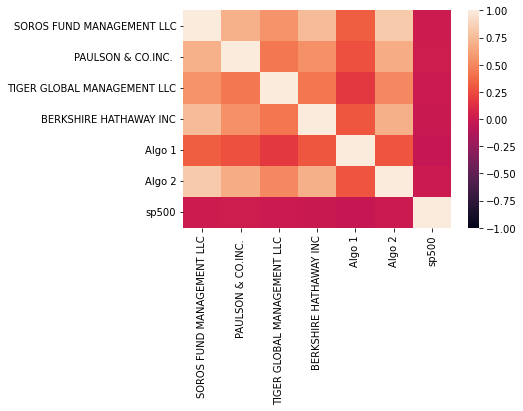

In [149]:
# Calculate the correlation
correlation = combined_returns.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling Beta Trend'}, xlabel='Date'>

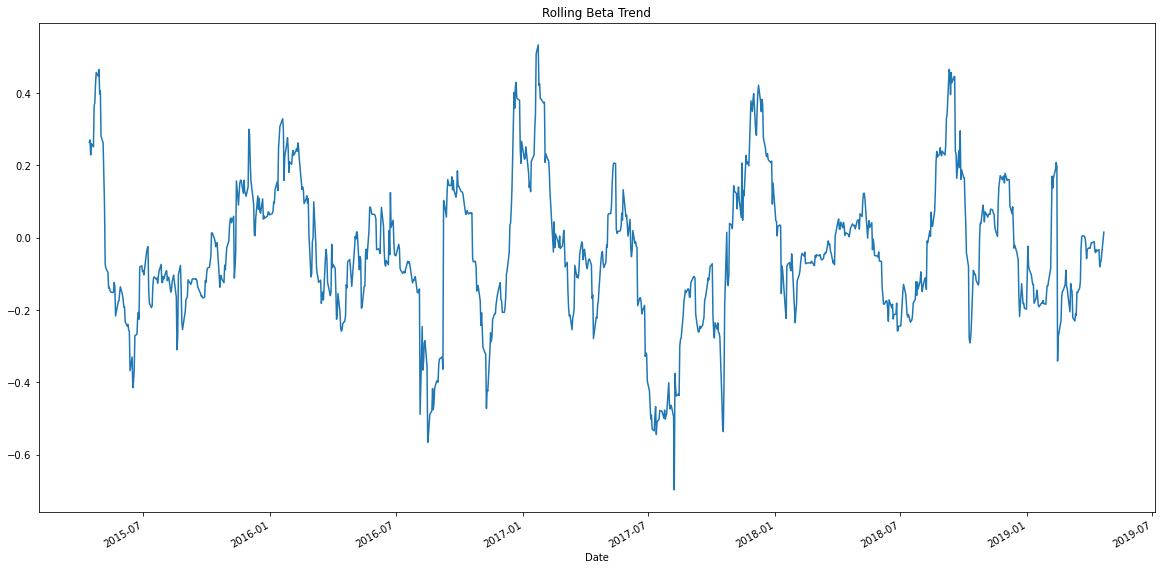

In [232]:
# Calculate covariance of a single portfolio
covariance = combined_returns['Algo 1'].cov(combined_returns['sp500'])

# Calculate variance of S&P 500
variance = combined_returns['sp500'].var()

# Computing beta
algo_beta = covariance / variance

# Plot beta trend
rolling_cov = combined_returns['Algo 1'].rolling(window=30).cov(combined_returns['sp500'])
rolling_var = combined_returns['sp500'].rolling(window=30).var()
rolling_beta = rolling_cov / rolling_var
rolling_beta.plot(figsize=(20,10), title="Rolling Beta Trend")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 21 EWM'}, xlabel='Date'>

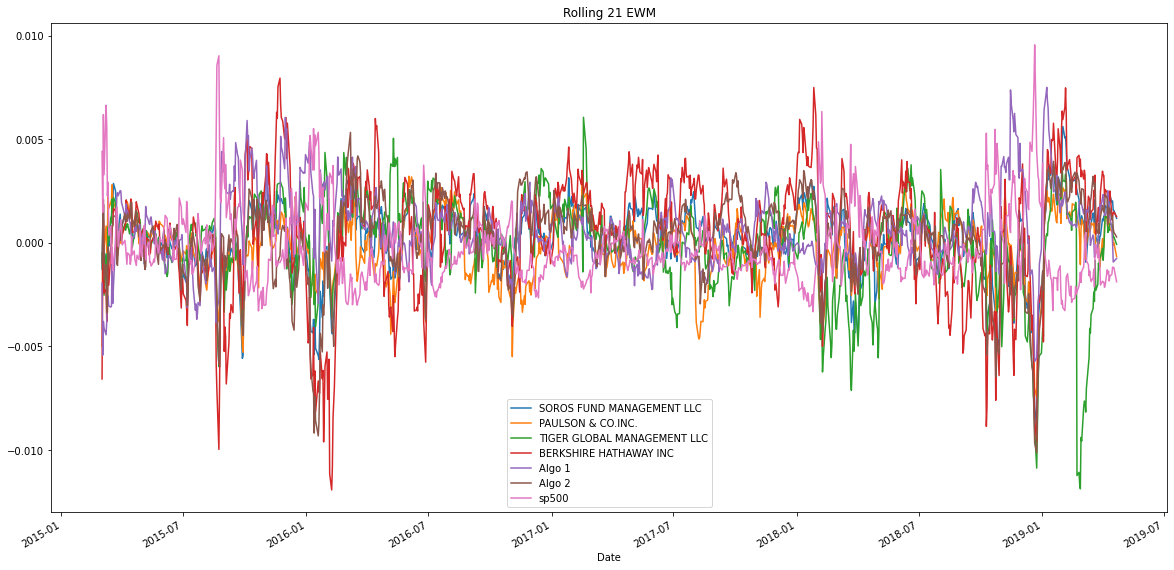

In [243]:
# Use `ewm` to calculate the rolling window
combined_ewm = combined_returns.ewm(span=21).mean()
combined_ewm.plot(figsize=(20,10),title="Rolling 21 EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [152]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252)/ (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
sp500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

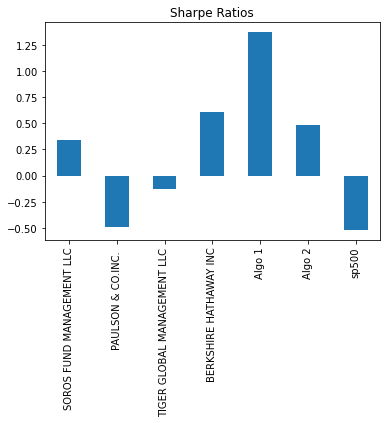

In [233]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algo portfolio outperformed all the others. Algo 1 in particular had the highest returns as well as the best reward to risk ratio according to the Sharpe ratio model. Algo 1 STD was also lower than sp500.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [154]:
# Reading data from 1st stock
csv_file = Path('Resources/cost_historical.csv')
cost_historical_csv = pd.read_csv(csv_file, index_col= 'Trade DATE', parse_dates=True)
cost_historical_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [155]:
# Reading data from 2nd stock
csv_file = Path('Resources/goog_historical.csv')
goog_historical_csv = pd.read_csv(csv_file, index_col= 'Trade DATE', parse_dates=True)
goog_historical_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [156]:
# Reading data from 3rd stock
csv_file = Path('Resources/aapl_historical.csv')
aapl_historical_csv = pd.read_csv(csv_file, index_col= 'Trade DATE', parse_dates=True)
aapl_historical_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [157]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([aapl_historical_csv, goog_historical_csv, cost_historical_csv], axis='columns', join='inner')
my_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [158]:
# Reset Date index
my_stocks=my_stocks.sort_index()
my_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [159]:
# Reorganize portfolio data by having a column per symbol
columns = ["Symbol", "AAPL", "Symbol", "GOOG", "Symbol", "COST"]
my_stocks.columns = columns
my_stocks = my_stocks.drop(columns=["Symbol"])
my_stocks.head()


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [160]:
# Calculate daily returns
my_stocks_returns = my_stocks.pct_change()
# Drop NAs
my_stocks_returns = my_stocks_returns.dropna().copy()
# Display sample data
my_stocks_returns.sample()

,AAPL,GOOG,COST
Trade DATE,,,
2018-09-05,-0.006525,-0.008789,0.003963


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [189]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_stocks_returns.dot(weights)

# Display sample data
my_portfolio_returns.sample()

Trade DATE
2018-10-10   -0.036941
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [213]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([my_portfolio_returns, combined_returns], axis='columns', join='inner')
all_returns = all_returns.rename(columns={0:'my_portfolio'})
all_returns.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


<AxesSubplot:>

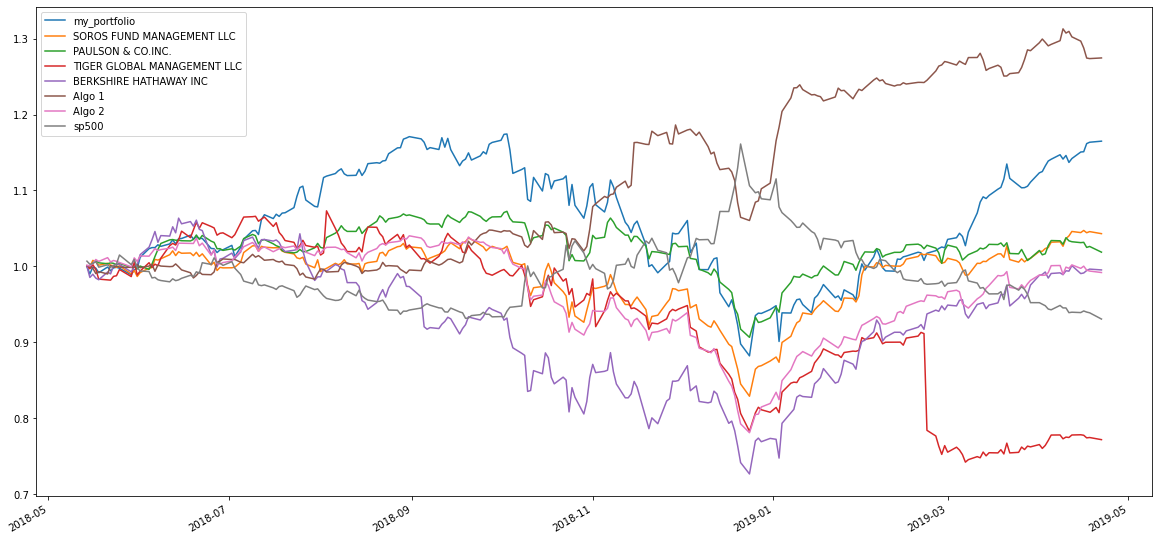

In [250]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(axis=0, inplace=True)
all_returns.head()
all_cumulative_returns = (1 + all_returns).cumprod()
all_cumulative_returns.plot(figsize=(20,10))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [226]:
# Calculate the annualized `std`
all_std = all_returns.std()
all_annual_std = all_std * np.sqrt(252)
sort_std = all_annual_std.sort_values(ascending=False)
sort_std

BERKSHIRE HATHAWAY INC         0.247305
TIGER GLOBAL MANAGEMENT LLC    0.232898
my_portfolio                   0.211627
sp500                          0.152469
SOROS FUND MANAGEMENT LLC      0.146812
Algo 2                         0.139499
Algo 1                         0.133927
PAULSON & CO.INC.              0.116928
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD'}>

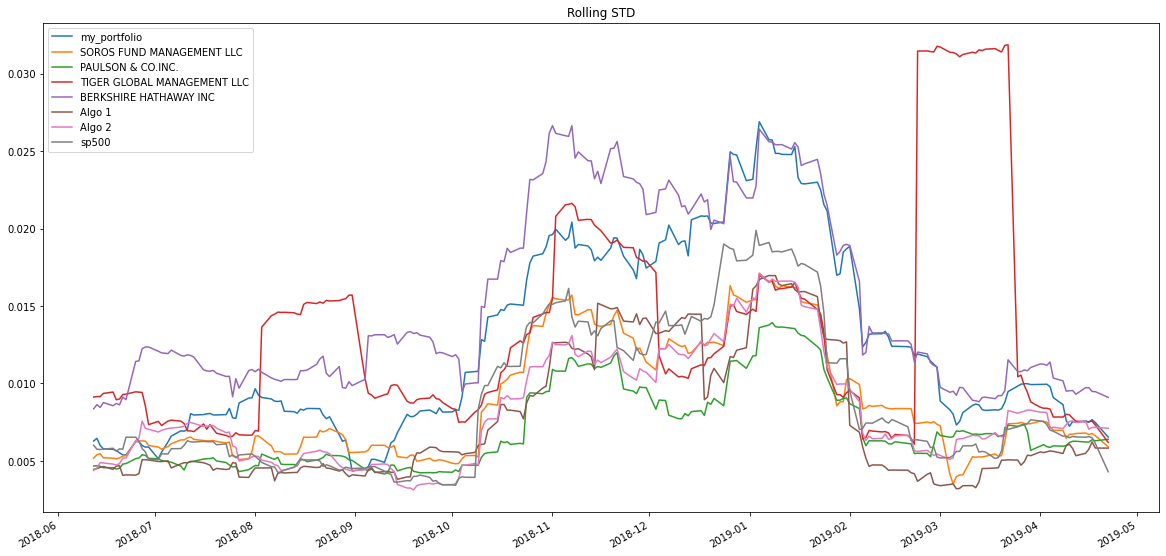

In [234]:
# Calculate rolling standard deviation
rolling_annual_std = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_annual_std.plot(figsize=(20,10), title="Rolling STD")

### Calculate and plot the correlation

<AxesSubplot:>

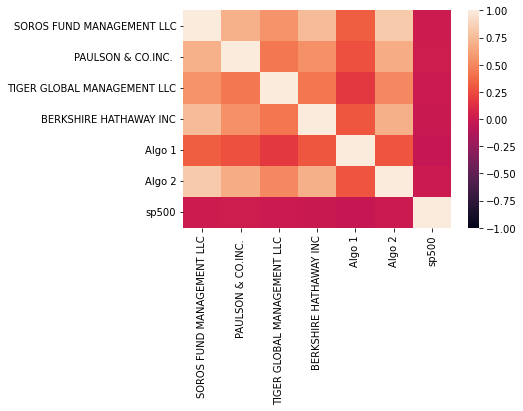

In [236]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()#.plot(figsize=(20, 10))
sns.heatmap(correlation, vmin=-1, vmax=1,)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Beta'}>

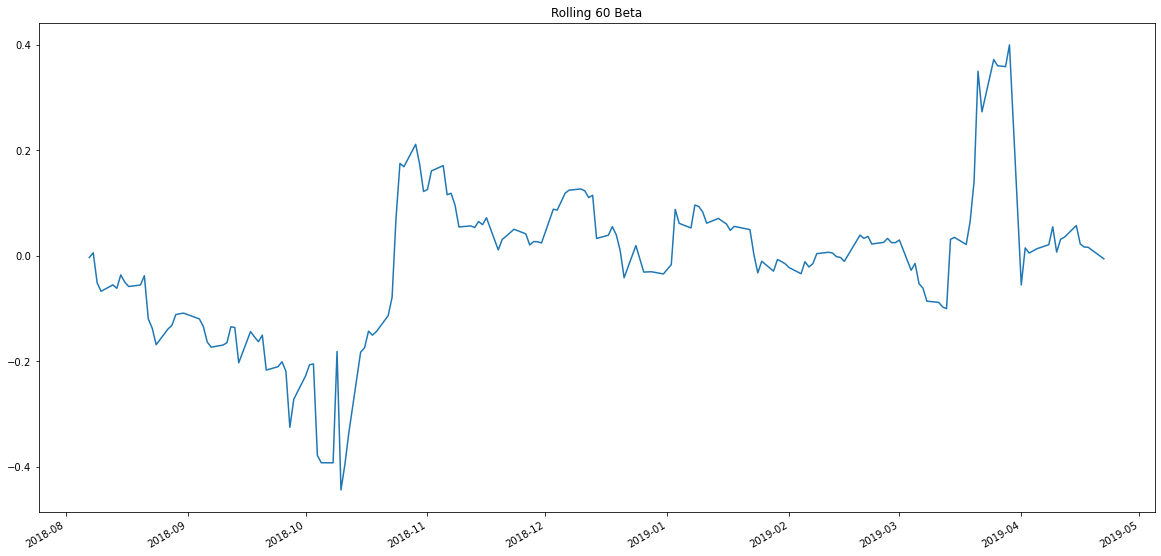

In [237]:
# Calculate and plot Beta
my_cov_rolling = all_returns['my_portfolio'].rolling(window=60).cov(all_returns['sp500'])
sp500_var_rolling = all_returns['sp500'].rolling(window=60).var()
my_beta_rolling = my_cov_rolling / sp500_var_rolling
my_beta_rolling.plot(figsize=(20,10), title="Rolling 60 Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [225]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = (all_returns.mean() * 252)/ (all_returns.std() * np.sqrt(252))
sorted_sharpe = all_sharpe_ratios.sort_values(ascending=False)
sorted_sharpe

Algo 1                         2.001260
my_portfolio                   0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
BERKSHIRE HATHAWAY INC         0.103006
Algo 2                         0.007334
sp500                         -0.427676
TIGER GLOBAL MANAGEMENT LLC   -1.066635
dtype: float64

<AxesSubplot:title={'center':'All Portfolios Sharpe Ratio'}>

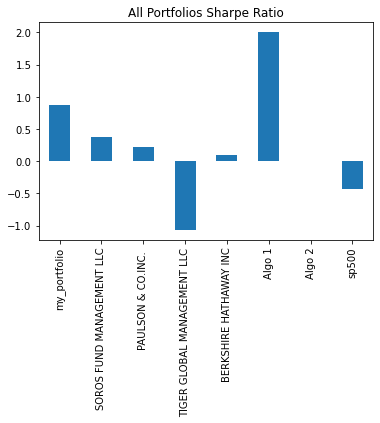

In [239]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind='bar', title="All Portfolios Sharpe Ratio")

### How does your portfolio do?
My portfolio is more volatile than the sp500 but also has a higher sharpe ratio. My portfolio outperform all but Algo 1 with cumulative returns.
